<a href="https://colab.research.google.com/github/TonyWang126/NYU-Econometrics-2021/blob/main/Note_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Timeseries variables


[Data Metrics](https://github.com/coinmetrics-io/data/blob/master/csv/metrics.csv)

In [ ]:
import pandas as pd
import numpy as np

### import the data for Ethereum

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/coinmetrics-io/data/master/csv/eth.csv")
df['time']=pd.to_datetime(df['time'])
df.head()

,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalCnt,AdrBalNtv0.001Cnt,AdrBalNtv0.01Cnt,AdrBalNtv0.1Cnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,AdrBalNtv1Cnt,AdrBalNtv1KCnt,AdrBalNtv1MCnt,AdrBalUSD100Cnt,AdrBalUSD100KCnt,AdrBalUSD10Cnt,AdrBalUSD10KCnt,AdrBalUSD10MCnt,AdrBalUSD1Cnt,AdrBalUSD1KCnt,AdrBalUSD1MCnt,AssetEODCompletionTime,BlkCnt,BlkSizeMeanByte,CapAct1yrUSD,CapMVRVCur,CapMVRVFF,CapMrktCurUSD,CapMrktFFUSD,CapRealUSD,DiffLast,DiffMean,...,SplyAdrBal1in10M,SplyAdrBal1in1B,SplyAdrBal1in1K,SplyAdrBal1in1M,SplyAdrBalNtv0.001,SplyAdrBalNtv0.01,SplyAdrBalNtv0.1,SplyAdrBalNtv1,SplyAdrBalNtv10,SplyAdrBalNtv100,SplyAdrBalNtv100K,SplyAdrBalNtv10K,SplyAdrBalNtv1K,SplyAdrBalNtv1M,SplyAdrBalUSD1,SplyAdrBalUSD10,SplyAdrBalUSD100,SplyAdrBalUSD100K,SplyAdrBalUSD10K,SplyAdrBalUSD10M,SplyAdrBalUSD1K,SplyAdrBalUSD1M,SplyAdrTop100,SplyAdrTop10Pct,SplyAdrTop1Pct,SplyCur,SplyExpFut10yr,SplyFF,TxCnt,TxCntSec,TxTfrCnt,TxTfrValAdjNtv,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,VelCur1yr,VtyDayRet180d,VtyDayRet30d
0,2015-07-30,9206.0,5685.0,9203.0,9203.0,1237.0,9151.0,9203.0,145.0,8094.0,9203.0,9203.0,9203.0,9203.0,7952.0,122.0,9142.0,1017.0,9203.0,5363.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,6911.0,643.886124,NaN,NaN,NaN,NaN,NaN,0.0,3.382792e+11,1.213355e+11,...,7.204905e+07,7.204930e+07,4.050941e+07,7.201769e+07,7.204930e+07,7.204930e+07,7.204930e+07,7.204930e+07,7.204898e+07,7.200534e+07,3.853810e+07,5.890308e+07,7.102484e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.793308e+07,3.553810e+07,7.204930e+07,4.471633e+08,7.123930e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2015-07-31,424.0,5692.0,9359.0,9359.0,1238.0,9278.0,9359.0,145.0,8152.0,9359.0,9359.0,9359.0,9359.0,8003.0,122.0,9271.0,1018.0,9359.0,5368.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,6863.0,582.027976,NaN,NaN,NaN,NaN,NaN,0.0,8.231927e+11,6.029419e+11,...,7.208510e+07,7.208549e+07,4.050941e+07,7.205138e+07,7.208549e+07,7.208549e+07,7.208549e+07,7.208549e+07,7.208504e+07,7.203841e+07,3.853810e+07,5.891693e+07,7.104616e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.808693e+07,3.563810e+07,7.208549e+07,2.721499e+08,7.127549e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2015-08-01,413.0,5699.0,9474.0,9474.0,1238.0,9368.0,9474.0,145.0,8188.0,9474.0,9474.0,9474.0,9474.0,8030.0,122.0,9360.0,1019.0,9474.0,5370.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5293.0,575.164179,NaN,NaN,NaN,NaN,NaN,0.0,9.566506e+11,8.872542e+11,...,7.211269e+07,7.211320e+07,4.050941e+07,7.207721e+07,7.211320e+07,7.211320e+07,7.211320e+07,7.211320e+07,7.211262e+07,7.206358e+07,3.853810e+07,5.893198e+07,7.106000e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.821198e+07,3.573810e+07,7.211320e+07,2.257182e+08,7.130320e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2015-08-02,432.0,5708.0,9561.0,9561.0,1238.0,9456.0,9561.0,145.0,8223.0,9561.0,9561.0,9561.0,9561.0,8051.0,122.0,9443.0,1019.0,9561.0,5381.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5358.0,580.878686,NaN,NaN,NaN,NaN,NaN,0.0,1.102546e+12,1.020254e+12,...,7.214092e+07,7.214142e+07,4.050941e+07,7.210380e+07,7.214142e+07,7.214142e+07,7.214142e+07,7.214142e+07,7.214080e+07,7.208884e+07,3.853810e+07,5.893877e+07,7.108533e+07,1.290148e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.633810e+07,5.830877e+07,3.583810e+07,7.214142e+07,2.100940e+08,7.133142e+07,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,2015-08-03,444.0,5715.0,9637.0,9637.0,1237.0,9520.0,9637.0,145.0,8262.0,9637.0,9637.0,9637.0,9637.0,8078.0,122.0,9508.0,1019.0,9637.0,5382.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.614335e+09,5280.0,587.112311,NaN,NaN,NaN,NaN,NaN,0.0,1.154732e+12,1.125837e+12,...,7.216883e+07,7.216940e+07,4.050941e+07,7.213076e+07,7.216940e+07,7.216940e+07,7.216940e+07,7.216940e+07,7.216873e+07,7.211491e+07,3.853810e+07,5.8944

In [ ]:
import plotly.express as px
import plotly.offline as py     
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
trace0 = go.Scatter(x = df["time"], y = df["TxTfrValAdjUSD"], hoverinfo='x+y', mode='lines',  name = 'Transactions, transfers, value, adjusted, USD')
trace1 = go.Scatter(x = df["time"], y = df['PriceUSD'], hoverinfo='x+y', mode='lines',  name = 'Price, USD')

layout = go.Layout(title="Price and Transaction Value of Ethereum in Past Five Years ", xaxis = dict(title="date"), yaxis = dict(title ="USD") ) 
data = [trace0, trace1]


fig1 = go.Figure(layout = layout, data = data) 
fig1.update_yaxes(type="log")
fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=3, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
          
        ])))
py.iplot(fig1)

### Calculate lag variables

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html

In [ ]:
df['TxTfrValAdjUSD_Minus_1']=df['TxTfrValAdjUSD'].shift(1)
df[['TxTfrValAdjUSD','TxTfrValAdjUSD_Minus_1']].tail()

,TxTfrValAdjUSD,TxTfrValAdjUSD_Minus_1
2154,1.542045e+10,1.183860e+10
2155,7.311968e+09,1.542045e+10
2156,8.333759e+09,7.311968e+09
2157,8.054480e+09,8.333759e+09
2158,5.637865e+09,8.054480e+09


###Calculate differences

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

In [ ]:
df['TxTfrValAdjUSD_Diff_1']=df['TxTfrValAdjUSD'].diff(1)
df[['TxTfrValAdjUSD','TxTfrValAdjUSD_Diff_1']].tail()

,TxTfrValAdjUSD,TxTfrValAdjUSD_Diff_1
2154,1.542045e+10,3.581848e+09
2155,7.311968e+09,-8.108481e+09
2156,8.333759e+09,1.021792e+09
2157,8.054480e+09,-2.792790e+08
2158,5.637865e+09,-2.416615e+09


### Calculate Growth Rate and Approximate Growth Rate

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

In [ ]:
df['TxTfrValAdjUSD_Growth_1']=df['TxTfrValAdjUSD'].pct_change(1)
df['TxTfrValAdjUSD_Growth_Aprx_1']=np.log(df['TxTfrValAdjUSD']).diff(1)
df[['TxTfrValAdjUSD','TxTfrValAdjUSD_Growth_1','TxTfrValAdjUSD_Growth_Aprx_1']].tail()

,TxTfrValAdjUSD,TxTfrValAdjUSD_Growth_1,TxTfrValAdjUSD_Growth_Aprx_1
2154,1.542045e+10,0.302557,0.264329
2155,7.311968e+09,-0.525827,-0.746182
2156,8.333759e+09,0.139742,0.130802
2157,8.054480e+09,-0.033512,-0.034086
2158,5.637865e+09,-0.300034,-0.356723


In [ ]:
trace0 = go.Scatter(x = df["time"], y = df["TxTfrValAdjUSD_Growth_1"], hoverinfo='x+y', mode='lines',  name = 'The Growth Rate of Price, Percentage')
trace1 = go.Scatter(x = df["time"], y = df['TxTfrValAdjUSD_Growth_Aprx_1'], hoverinfo='x+y', mode='lines',  name = 'The Growth Rate of Price Approximation, Percentage')

layout = go.Layout(title="Time series variables", xaxis = dict(title="date"), yaxis = dict(title ="Percentage") ) 
data = [trace0, trace1]


fig1 = go.Figure(layout = layout, data = data) 
fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=3, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
          
        ])))
py.iplot(fig1)

### lag plot

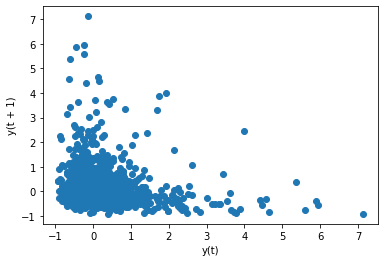

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1']
pd.plotting.lag_plot(s, lag=1)

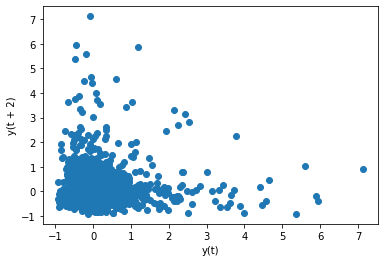

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1']
pd.plotting.lag_plot(s, lag=2)

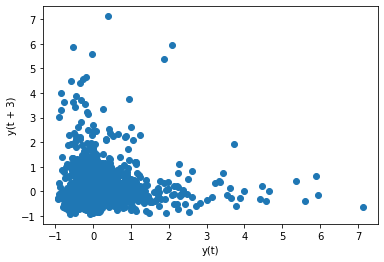

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1']
pd.plotting.lag_plot(s, lag=3)

### auto-correlation plot

https://pandas.pydata.org/docs/reference/api/pandas.plotting.autocorrelation_plot.html

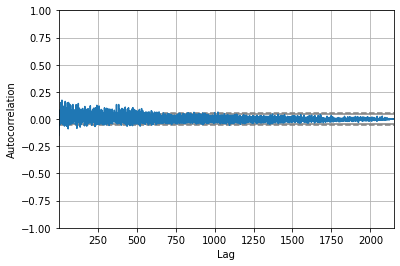

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1'].dropna()
pd.plotting.autocorrelation_plot(s)

###calculate auto-correlation coefficient

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1'].dropna()
s.autocorr(lag=1)  

-0.14830006737077012

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1'].dropna()
s.autocorr(lag=2)  

-0.06997876188431332

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1'].dropna()
s.autocorr(lag=3)  

-0.03550197263427479

#Auto Regressions

### AR(1) Manually


https://www.statsmodels.org/stable/regression.html

In [ ]:
import statsmodels.api as sm

In [ ]:
# define the dependent and independent variables
df=df.dropna()
X=df["TxTfrValAdjUSD_Minus_1"]
y=df['TxTfrValAdjUSD']

In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,TxTfrValAdjUSD_Minus_1
374,1.0,1.829512e+07
375,1.0,2.177514e+07
376,1.0,2.257538e+07
377,1.0,4.387603e+07
378,1.0,5.494717e+07


In [ ]:
# conduct regression
model = sm.OLS(y, X).fit()

In [ ]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         TxTfrValAdjUSD   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     1613.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):          1.03e-251
Time:                        00:49:19   Log-Likelihood:                -41573.
No. Observations:                1785   AIC:                         8.315e+04
Df Residuals:                    1783   BIC:                         8.316e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.71

### AR(P) statsmodel

In [ ]:
pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [ ]:
#This cell sets the plotting style, registers pandas date converters for matplotlib, and sets the default figure size.
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc('figure',figsize=(16, 6))

AR (3)

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1'].dropna()
mod = AutoReg(s, 3, old_names=False)
res = mod.fit()
print(res.summary())

                               AutoReg Model Results                               
Dep. Variable:     TxTfrValAdjUSD_Growth_1   No. Observations:                 1785
Model:                          AutoReg(3)   Log Likelihood               -1202.351
Method:                    Conditional MLE   S.D. of innovations              0.475
Date:                     Mon, 28 Jun 2021   AIC                             -1.483
Time:                             00:49:21   BIC                             -1.467
Sample:                                  3   HQIC                            -1.477
                                      1785                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1367      0.012     11.334      0.000       0.113       0.160
TxTfrValAdjUSD_Growth_1.L1    -0.2476      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [ ]:
res = mod.fit(cov_type="HC0")
print(res.summary())

                               AutoReg Model Results                               
Dep. Variable:     TxTfrValAdjUSD_Growth_1   No. Observations:                 1785
Model:                          AutoReg(3)   Log Likelihood               -1202.351
Method:                    Conditional MLE   S.D. of innovations              0.475
Date:                     Mon, 28 Jun 2021   AIC                             -1.483
Time:                             00:49:21   BIC                             -1.467
Sample:                                  3   HQIC                            -1.477
                                      1785                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1367      0.013     10.414      0.000       0.111       0.162
TxTfrValAdjUSD_Growth_1.L1    -0.2476      

No handles with labels found to put in legend.


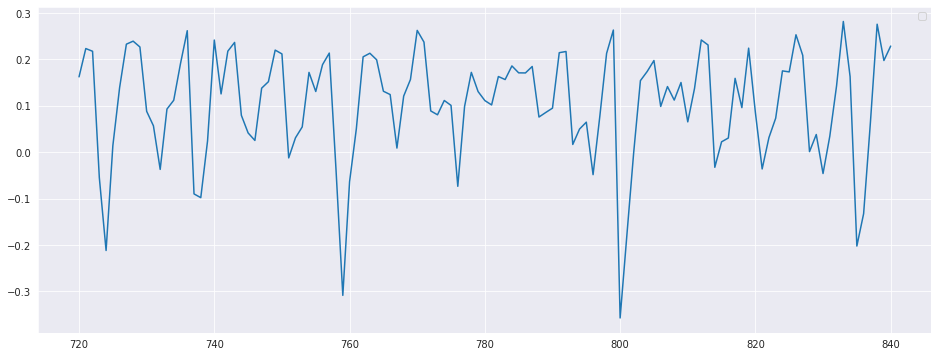

In [ ]:
fig = res.plot_predict(720, 840)

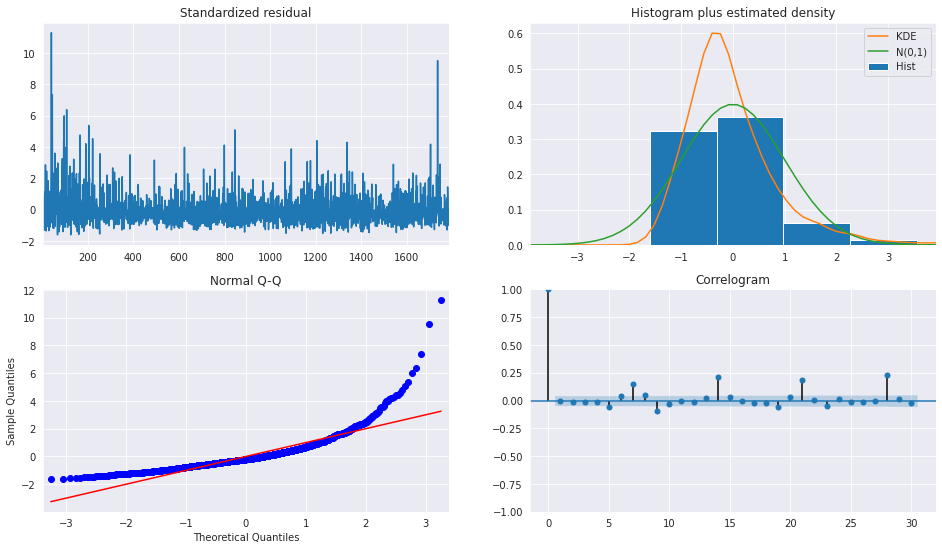

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

### how to choice the number of Lag: BIC and AIC criteria

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1'].dropna()
sel = ar_select_order(s, 13,'bic', old_names=False)
sel.ar_lags

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
sel = ar_select_order(s, 13, 'bic', old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                               AutoReg Model Results                               
Dep. Variable:     TxTfrValAdjUSD_Growth_1   No. Observations:                 1785
Model:                          AutoReg(8)   Log Likelihood               -1166.663
Method:                    Conditional MLE   S.D. of innovations              0.467
Date:                     Mon, 28 Jun 2021   AIC                             -1.514
Time:                             00:49:24   BIC                             -1.483
Sample:                                  8   HQIC                            -1.502
                                      1785                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1198      0.014      8.547      0.000       0.092       0.147
TxTfrValAdjUSD_Growth_1.L1    -0.2624      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



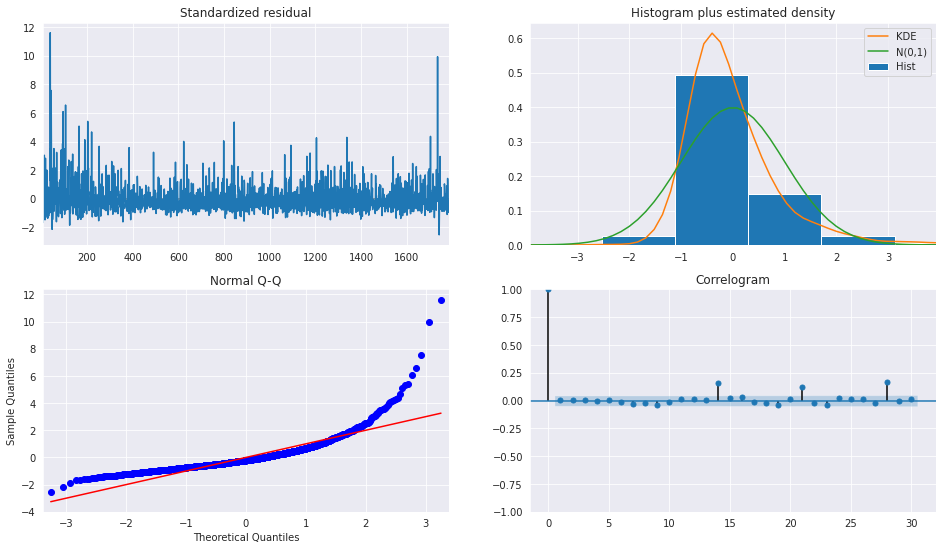

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1'].pct_change(1).dropna()
sel = ar_select_order(s, 13,'aic', old_names=False)
sel.ar_lags

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



array([], dtype=int64)

In [ ]:
s=df['TxTfrValAdjUSD_Growth_1'].pct_change(1).dropna()
sel = ar_select_order(s, 13, 'aic', old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

                               AutoReg Model Results                               
Dep. Variable:     TxTfrValAdjUSD_Growth_1   No. Observations:                 1784
Model:                          AutoReg(0)   Log Likelihood              -17572.309
Method:                    Conditional MLE   S.D. of innovations           4587.133
Date:                     Mon, 28 Jun 2021   AIC                             16.864
Time:                             00:49:25   BIC                             16.870
Sample:                                  0   HQIC                            16.867
                                      1784                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -110.4045    108.604     -1.017      0.309    -323.264     102.454


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



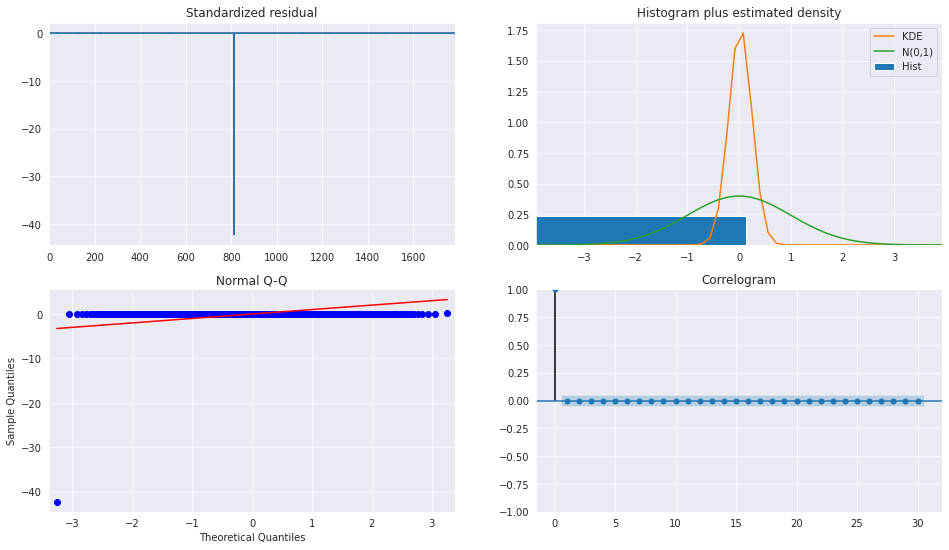

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

In [ ]:
s.shape

(1784,)

ploting predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



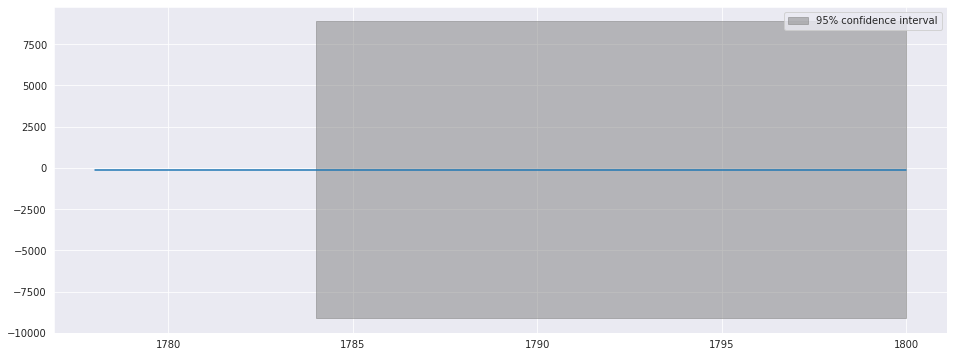

In [ ]:
fig = res.plot_predict(start=1778, end=1800)

### allow global search to allow longer lag without requiring shorter lags. 

In [ ]:
s=df['TxTfrValAdjUSD'].pct_change(1).dropna()
sel = ar_select_order(s, 13,'aic',glob=True, old_names=False)
sel.ar_lags

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



array([1, 2, 3, 5, 7, 8, 9])

In [ ]:
s=df['TxTfrValAdjUSD'].pct_change(1).dropna()
sel = ar_select_order(s, 13, 'aic', glob=True, old_names=False)
sel.ar_lags
res = sel.model.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                            AutoReg Model Results                             
Dep. Variable:         TxTfrValAdjUSD   No. Observations:                 1784
Model:              Restr. AutoReg(9)   Log Likelihood               -1164.014
Method:               Conditional MLE   S.D. of innovations              0.466
Date:                Mon, 28 Jun 2021   AIC                             -1.516
Time:                        00:49:51   BIC                             -1.488
Sample:                             9   HQIC                            -1.506
                                 1784                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1265      0.013      9.935      0.000       0.102       0.151
TxTfrValAdjUSD.L1    -0.2578      0.024    -10.951      0.000      -0.304      -0.212
TxTfrValAdjUSD.L2    -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



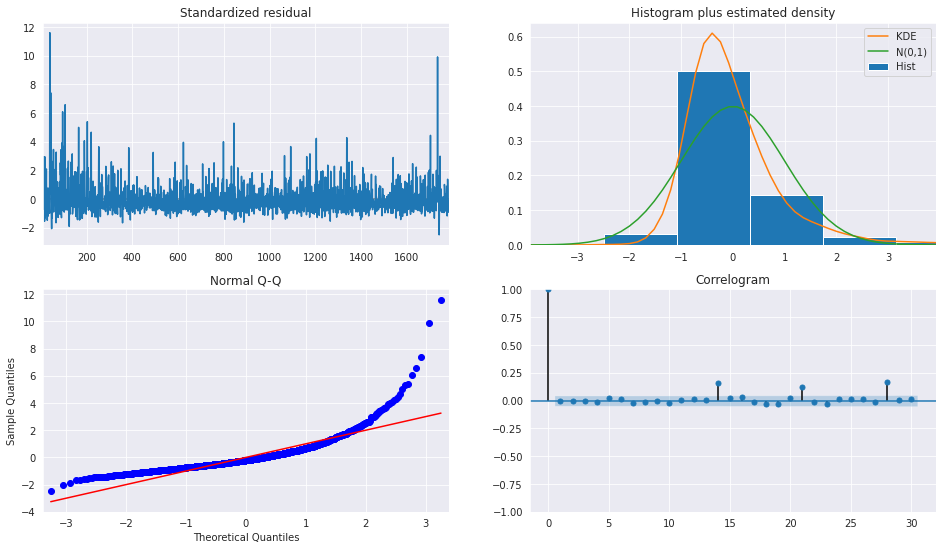

In [ ]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

### comparing 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



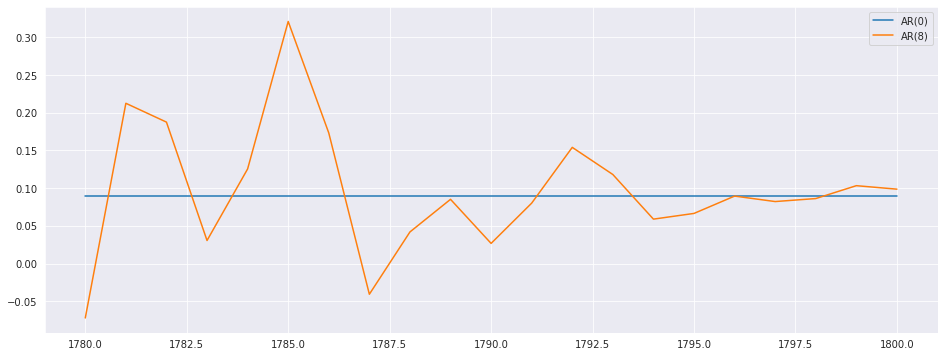

In [ ]:
res_ar0 = AutoReg(s, 0, old_names=False).fit()
res_ar8 = AutoReg(s, 8, old_names=False).fit()

predictions = pd.DataFrame({"AR(0)": res_ar0.predict(start=1780, end=1800),
                            "AR(8)": res_ar8.predict(start=1780, end=1800)})
_, ax = plt.subplots()
ax = predictions.plot(ax=ax)

### The Dickey-Fuller test for stationary

Null hypothesis:not stationary


https://machinelearningmastery.com/time-series-data-stationary-python/

In [ ]:
s=df['TxTfrValAdjUSD'].pct_change(1).dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(s)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.324907
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
s=df['TxTfrValAdjUSD'].dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(s)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.661149
p-value: 0.081006
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


# ARIMA Regression

https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_0.html
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from statsmodels.graphics.api import qqplot

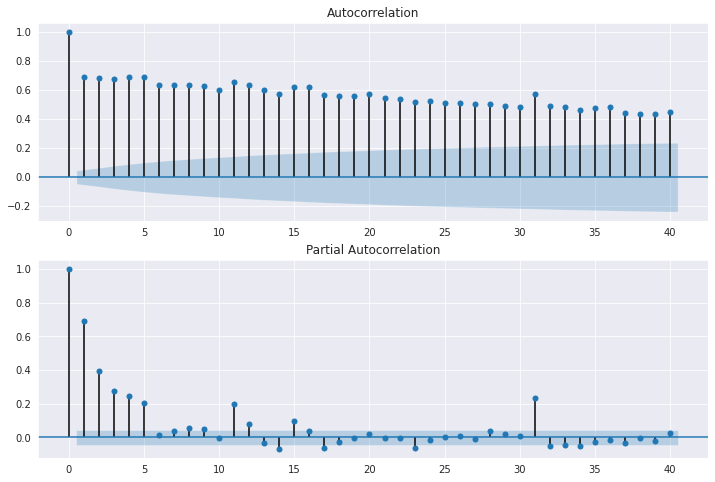

In [ ]:
s=df['TxTfrValAdjUSD']
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(s, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(s, lags=40, ax=ax2)